In [3]:
! pip install GDAL

Defaulting to user installation because normal site-packages is not writeable
  Using cached GDAL-3.8.4.tar.gz (802 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for GDAL
Failed to build GDAL


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [138 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\osgeo
      copying osgeo\gdal.py -> build\lib.win-amd64-cpython-311\osgeo
      copying osgeo\gdalconst.py -> build\lib.win-amd64-cpython-311\osgeo
      copying osgeo\gdalnumeric.py -> build\lib.win-amd64-cpython-311\osgeo
      copying osgeo\gdal_array.py -> build\lib.win-amd64-cpython-311\osgeo
      copying osgeo\gnm.py -> build\lib.win-amd64-cpython-311\osgeo
      copying osgeo\ogr.py -> build\lib.win-amd64-cpython-311\osgeo
      copying osgeo\osr.py -> build\lib.win-amd64-cpython-311\osgeo
      copying osgeo\__init__.py -> build\lib.win-amd64-cpython-311\osgeo
      creating build\lib.win-amd64-cpython-311\osgeo_utils
      copying gdal-utils\osgeo_utils

In [45]:
import os
#from osgeo import gdal
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt
from matplotlib import animation

from dotenv import dotenv_values
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal.lib
import pysal.model
#from osgeo import gdal
#from osgeo import osr



## 1. data

raster data of bus speed

In [46]:


# Open a raster file
with rasterio.open('D:\CASApre\DataDive2024\hourly_speed_data.tif') as src:
    print(f'Raster shape: {src.shape}')
    print(f'Raster bands: {src.count}')
    print(f'Raster data types: {src.dtypes}')
    print(f'Raster valid data mask: {src.dataset_mask()}')
    print(f'Raster transform (affine transformation matrix): {src.transform}')
    print(f'Raster crs: {src.crs}')

Raster shape: (374, 532)
Raster bands: 1754
Raster data types: ('float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', '

Band 1 shape: (374, 532)
Band 1 data type: float32
Band 1 data:
[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


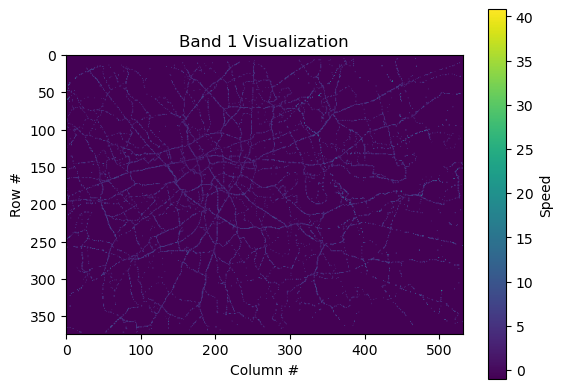

In [47]:
import rasterio


with rasterio.open('D:\CASApre\DataDive2024\hourly_speed_data.tif') as src:

    band1 = src.read(1)  # 1-indexed band number
    
    
    print(f'Band 1 shape: {band1.shape}')
    print(f'Band 1 data type: {band1.dtype}')
    print(f'Band 1 data:\n{band1}')
    
    plt.imshow(band1, cmap='viridis')
    plt.colorbar(label='Speed')
    plt.title('Band 1 Visualization')
    plt.xlabel('Column #')
    plt.ylabel('Row #')
    plt.show()


bus visualization data

MovieWriter ffmpeg unavailable; using Pillow instead.


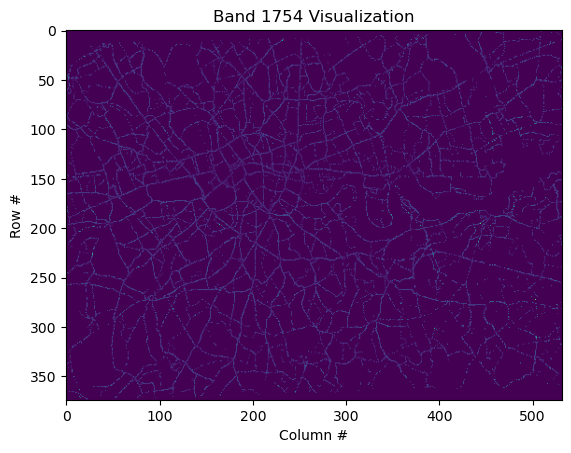

In [7]:
import rasterio
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the file paths and directories
date_directory = 'D:\CASApre\DataDive2024\\'  # Modify this according to your file structure
files_to_load = ['hourly_speed_data.tif']  # Modify this according to your file structure
visdir = 'path_to_output_directory'  # Modify this according to your preferences

# Open the raster file
with rasterio.open(date_directory + files_to_load[0]) as src:
    fig, ax = plt.subplots()

    # Read all bands
    all_bands = src.read()

    # Function to update the plot for each frame
    def animate(i):
        ax.clear()
        im = ax.imshow(all_bands[i], cmap='viridis')
        ax.set_title(f'Band {i + 1} Visualization')
        ax.set_xlabel('Column')
        ax.set_ylabel('Row')
        ax.set_aspect('auto')  # Set aspect ratio to auto
        return [im]

    # Create the animation
    anim = animation.FuncAnimation(fig, animate, frames=all_bands.shape[0], interval=20, blit=True)

    # Save the animation as a GIF
    anim.save(visdir + 'distinctJourneyCounts_mplanimate_20231028.gif', fps=1) 


AttributeError: '_tkinter.tkapp' object has no attribute 'figure'

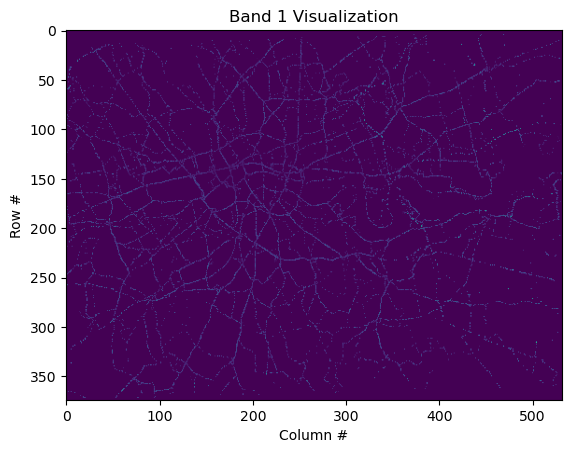

In [7]:
import rasterio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import tkinter as tk

# Define the file paths and directories
date_directory = 'D:\CASApre\DataDive2024\\'  # Modify this according to your file structure
files_to_load = ['hourly_speed_data.tif']  # Modify this according to your file structure
visdir = 'path_to_output_directory'  # Modify this according to your preferences

# Open the raster file
with rasterio.open(date_directory + files_to_load[0]) as src:
    fig, ax = plt.subplots()
    canvas = FigureCanvasTkAgg(fig, master=tk.Tk())  # Create a canvas
    canvas.draw()

    # Read all bands
    all_bands = src.read()

    # Function to update the plot for each frame
    def animate(i):
        ax.clear()
        im = ax.imshow(all_bands[i], cmap='viridis')
        ax.set_title(f'Band {i + 1} Visualization')
        ax.set_xlabel('Column #')
        ax.set_ylabel('Row #')
        ax.set_aspect('auto')  # Set aspect ratio to auto
        return [im]

    # Create the animation
    anim = animation.FuncAnimation(fig, animate, frames=all_bands.shape[0], interval=20, blit=True)

    # Add navigation toolbar
    toolbar = NavigationToolbar2Tk(canvas.get_tk_widget().master, tk.Tk())
    toolbar.update()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    # Save the animation as a GIF
    anim.save(visdir + 'zoom.gif', writer='pillow', fps=1)

    tk.mainloop()  # Start the Tkinter event loop




In [5]:
import rasterio
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk

# Define the file paths and directories
date_directory = 'D:\CASApre\DataDive2024\\'  # Modify this according to your file structure
files_to_load = ['hourly_speed_data.tif']  # Modify this according to your file structure

# Open the raster file
with rasterio.open(date_directory + files_to_load[0]) as src:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    canvas = FigureCanvasTkAgg(fig, master=tk.Tk())  # Create a canvas
    canvas.draw()

    # Read all bands
    all_bands = src.read()

    # Function to update the plot for each frame
    def animate(i):
        ax.clear()
        ax.imshow(all_bands[i], cmap='viridis', origin='upper', transform=ccrs.PlateCarree())
        ax.set_title(f'Band {i + 1} Visualization')
        ax.coastlines()
        return ax

    # Create the animation
    anim = animation.FuncAnimation(fig, animate, frames=all_bands.shape[0], interval=20, blit=False)

    # Add navigation toolbar
    toolbar = NavigationToolbar2Tk(fig.canvas, tk.Tk())  # Pass fig.canvas directly to the toolbar
    toolbar.update()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    tk.mainloop()  # Start the Tkinter event loop




C:\Users\dune\AppData\Roaming\Python\Python311\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\dune\AppData\Roaming\Python\Python311\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


air quality data

In [8]:
df = pd.read_csv('D:\CASApre\CUSP2024\EDA\Data\Waterloo_CE2.csv')

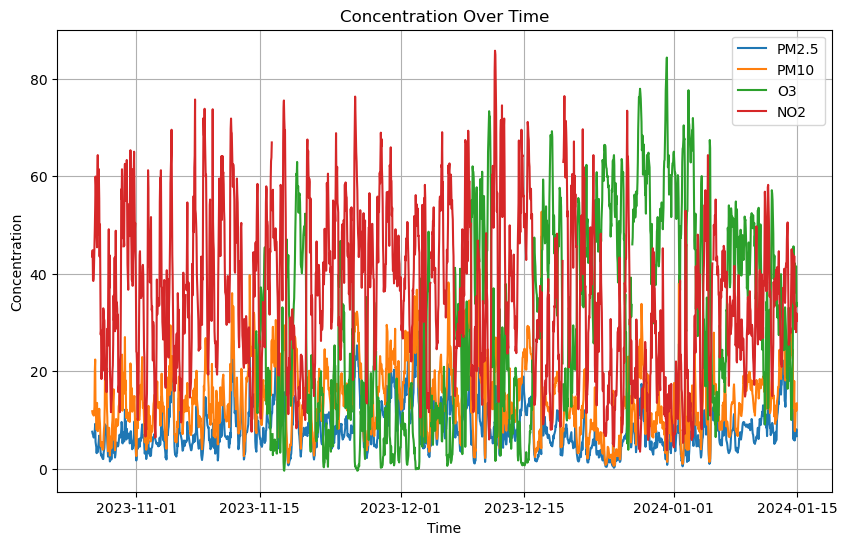

In [9]:
df['time'] = pd.to_datetime(df['time'])

df.set_index('time', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['PM2.5 Particulate (ug/m3)'], label='PM2.5')
plt.plot(df.index, df['PM10 Particulate (ug/m3)'], label='PM10')
plt.plot(df.index, df['Ozone (ug/m3)'], label='O3')
plt.plot(df.index, df['Nitrogen Dioxide (ug/m3)'], label='NO2')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
data= pd.read_csv("D:\CASApre\DataDive2024\day_five.csv")

In [36]:
data.head(5)

,location,day_of_week,NO2_min,NO2_25%,NO2_median,NO2_75%,NO2_max,bus_speed_min,bus_speed_25%,bus_speed_median,bus_speed_75%,bus_speed_max,bus_count_min,bus_count_25%,bus_count_median,bus_count_75%,bus_count_max
0,BL0,Friday,NaN,NaN,NaN,NaN,NaN,1.216799,2.154166,2.683451,3.638904,11.122191,0.0,5.0,10.0,13.0,22.0
1,BL0,Monday,NaN,NaN,NaN,NaN,NaN,1.455781,2.384965,3.041906,4.078229,12.074440,0.0,4.0,9.0,13.0,25.0
2,BL0,Saturday,NaN,NaN,NaN,NaN,NaN,1.032681,2.317563,2.848312,3.537067,8.345182,0.0,3.0,8.0,11.0,19.0
3,BL0,Sunday,NaN,NaN,NaN,NaN,NaN,0.621341,2.568653,3.269028,4.040663,12.542203,0.0,2.0,6.0,8.0,15.0
4,BL0,Thursday,NaN,NaN,NaN,NaN,NaN,0.862865,2.080083,2.763426,3.744746,9.102792,0.0,5.0,10.0,14.0,25.0


In [37]:
data.describe()
# data types
data.dtypes

location             object
day_of_week          object
NO2_min             float64
NO2_25%             float64
NO2_median          float64
NO2_75%             float64
NO2_max             float64
bus_speed_min       float64
bus_speed_25%       float64
bus_speed_median    float64
bus_speed_75%       float64
bus_speed_max       float64
bus_count_min       float64
bus_count_25%       float64
bus_count_median    float64
bus_count_75%       float64
bus_count_max       float64
dtype: object

KeyError: 'y'

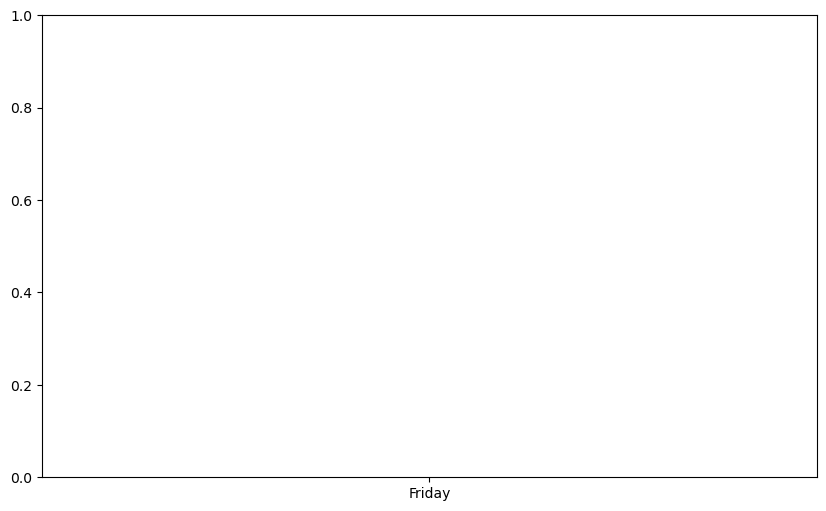

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 选择一个特定的传感器
sensor_id = 'BL0'  # 以BL0为例
data_sensor = data[data['location'] == sensor_id]

# 绘制NO2中位数在一周内的变化趋势
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='NO2_median', data=data_sensor, marker='o')
plt.title(f'NO2 Median Levels by Day of Week for {sensor_id}')
plt.xlabel('Day of Week')
plt.ylabel('NO2 Median')
plt.xticks(rotation=45)
plt.show()

NameError: name 'date_directory' is not defined

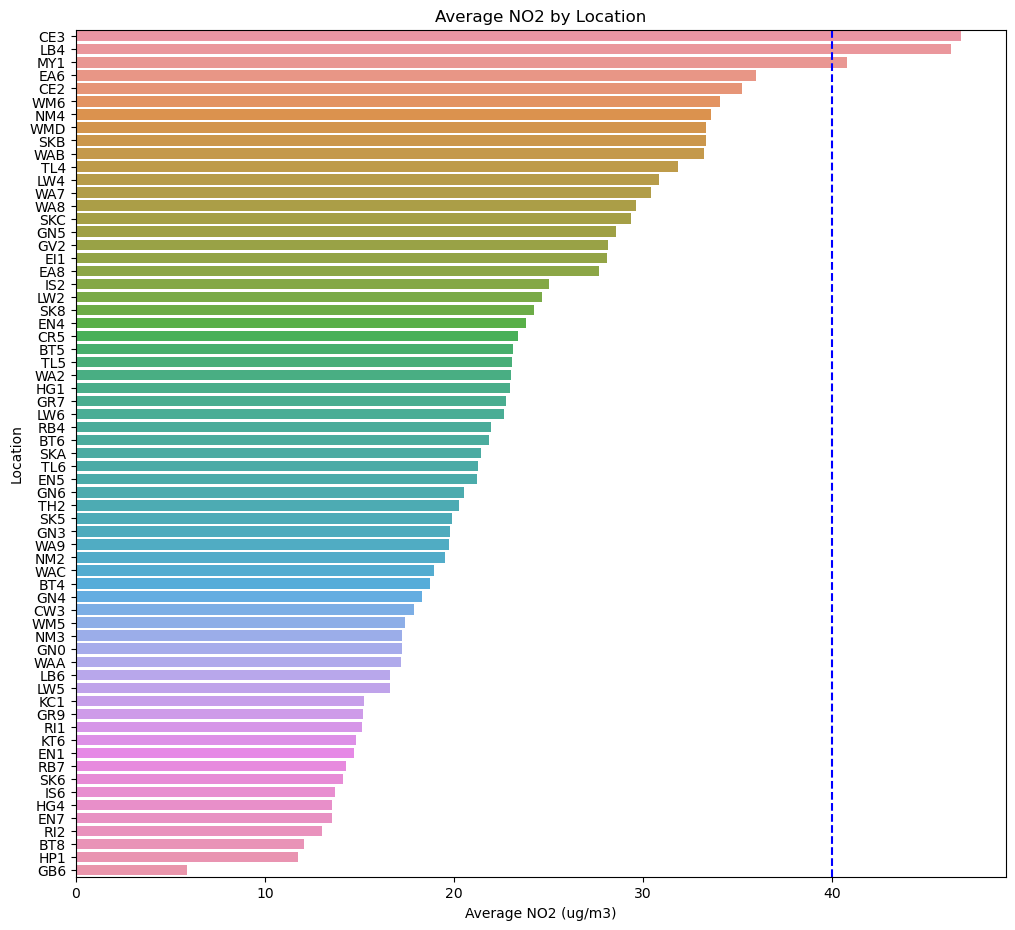

In [48]:

location_no2_median_avg = data.groupby('location')['NO2_median'].mean().reset_index()


plt.figure(figsize=(12, 11))
sns.barplot(x='NO2_median', y='location', data=location_no2_median_avg.sort_values('NO2_median', ascending=False))

plt.axvline(x=40, color='b', linestyle='--')  # Add vertical line at x=40

plt.title('Average NO2 by Location')
plt.xlabel('Average NO2 (ug/m3)')
plt.ylabel('Location')
plt.show()

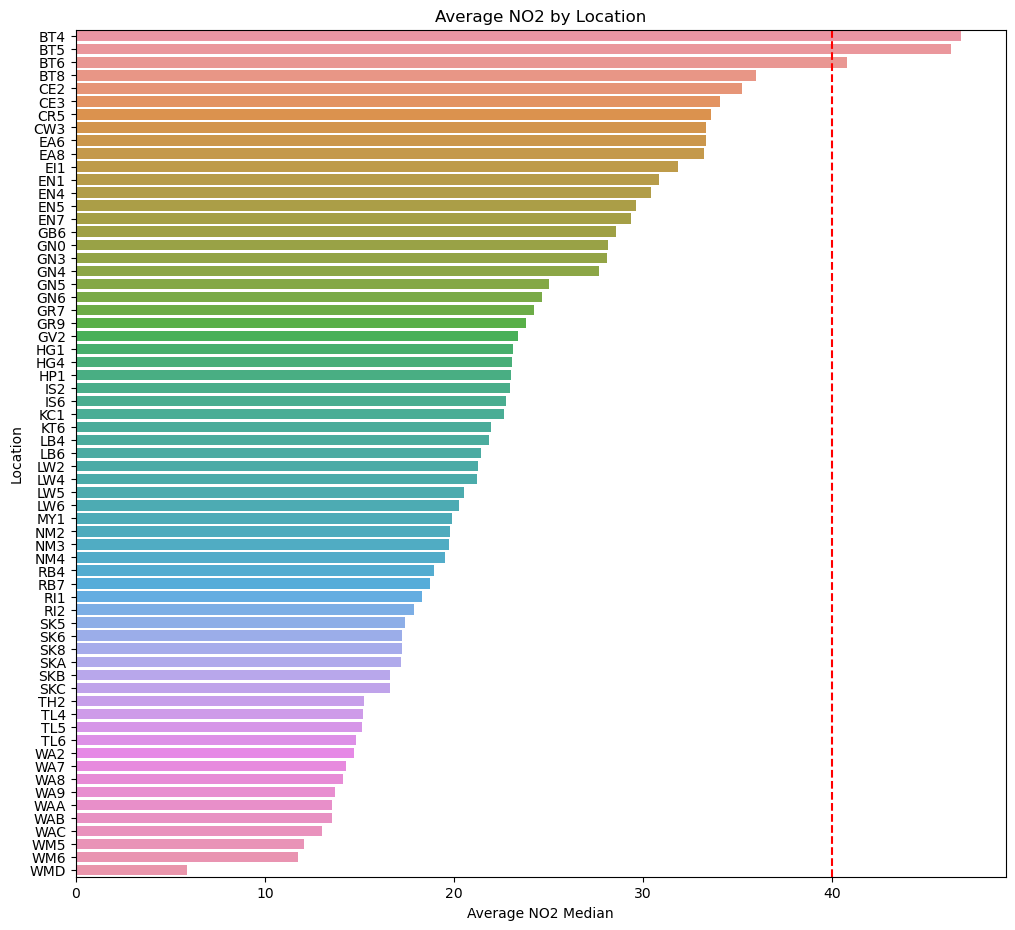

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Drop rows with NaN values in 'NO2_median' column
data = data.dropna(subset=['NO2_median'])

# Calculate average NO2_median by location
location_no2_median_avg = data.groupby('location')['NO2_median'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 11))
sns.barplot(x='NO2_median', y='location', data=location_no2_median_avg.sort_values('NO2_median', ascending=False))
plt.axvline(x=40, color='r', linestyle='--')  # Add vertical line at x=40
plt.title('Average NO2 by Location')
plt.xlabel('Average NO2 Median')
plt.ylabel('Location')

# Set y-axis tick parameters to ensure all labels are displayed
plt.yticks(range(len(location_no2_median_avg['location'])), location_no2_median_avg['location'])

plt.show()


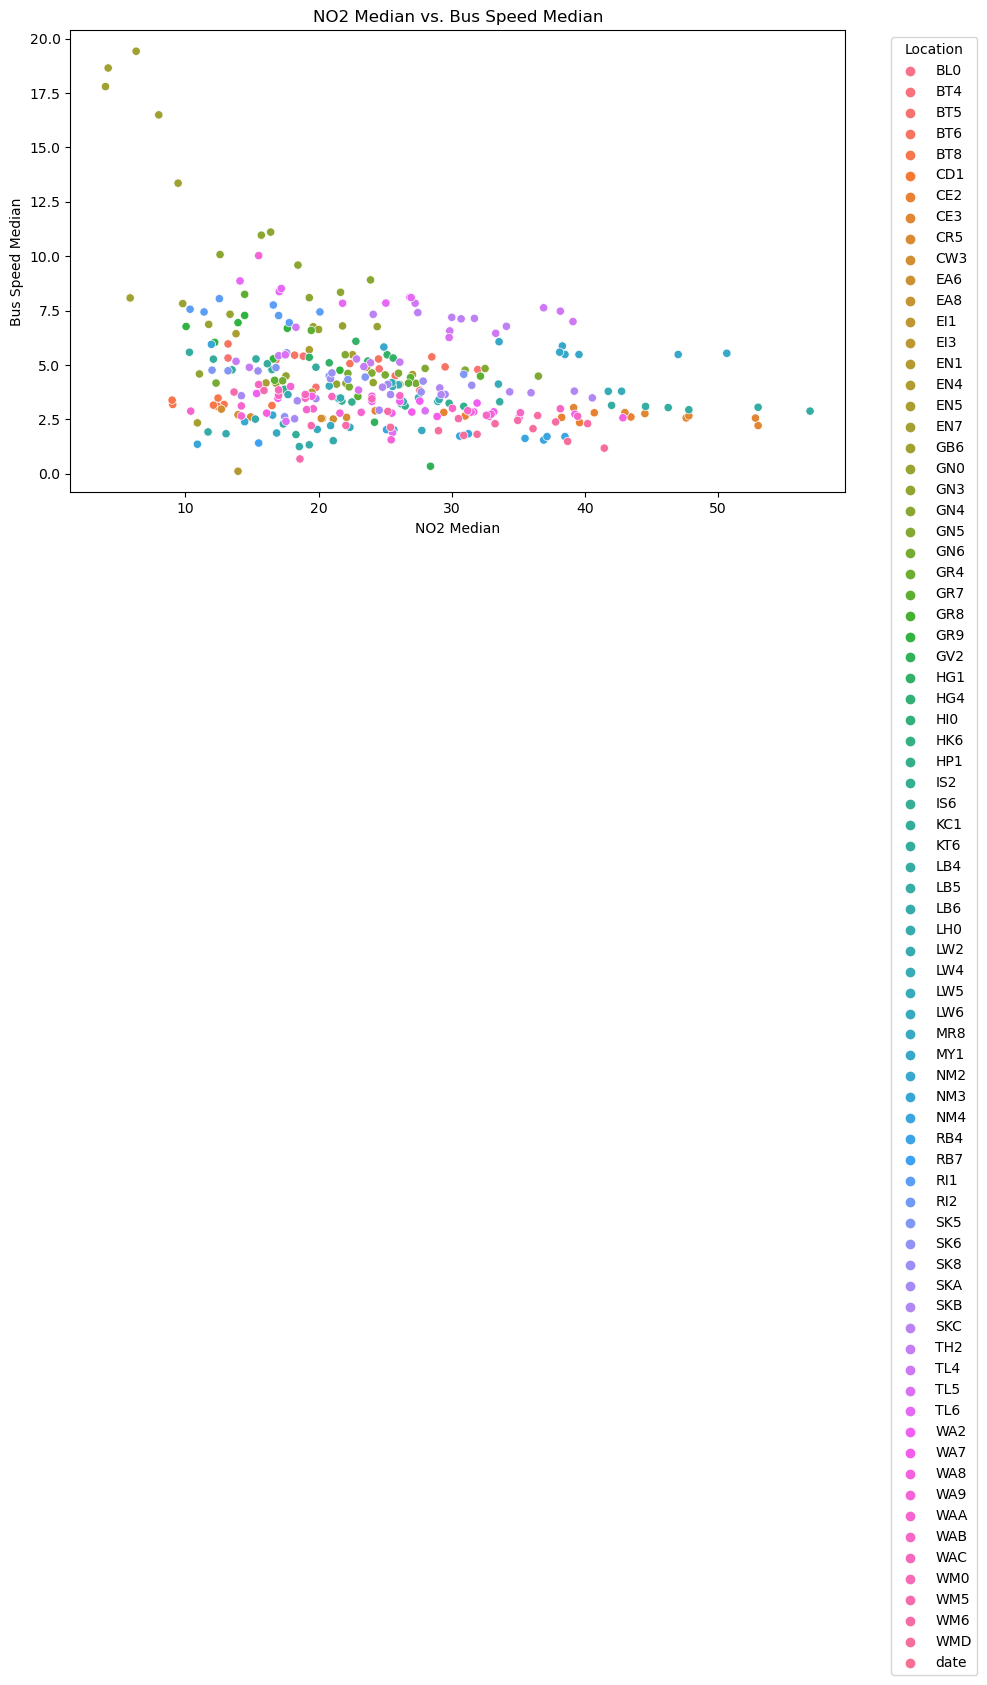

In [24]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO2_median', y='bus_speed_median', hue='location', data=data)
plt.title('NO2 Median vs. Bus Speed Median')
plt.xlabel('NO2 Median')
plt.ylabel('Bus Speed Median')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

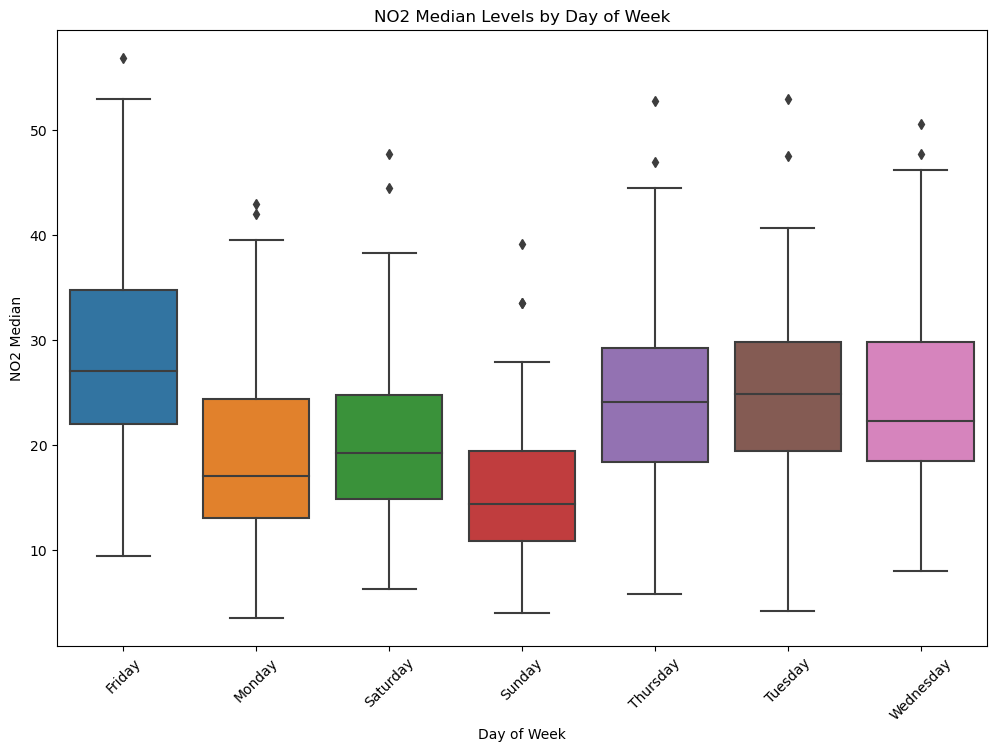

In [25]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='day_of_week', y='NO2_median', data=data)
plt.title('NO2 Median Levels by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('NO2 Median')
plt.xticks(rotation=45)
plt.show()

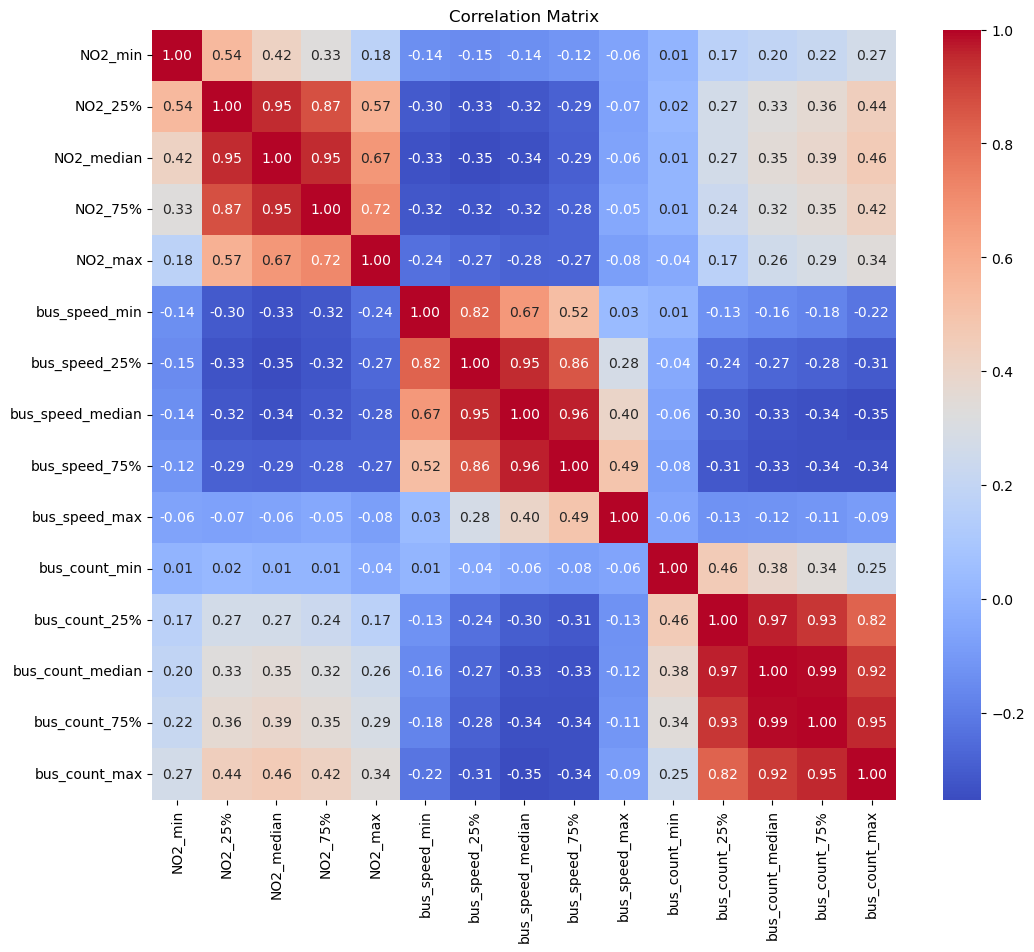

In [26]:

corr_matrix = data[['NO2_min', 'NO2_25%', 'NO2_median', 'NO2_75%', 'NO2_max',
                    'bus_speed_min', 'bus_speed_25%', 'bus_speed_median', 'bus_speed_75%', 'bus_speed_max',
                    'bus_count_min', 'bus_count_25%', 'bus_count_median', 'bus_count_75%', 'bus_count_max']].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

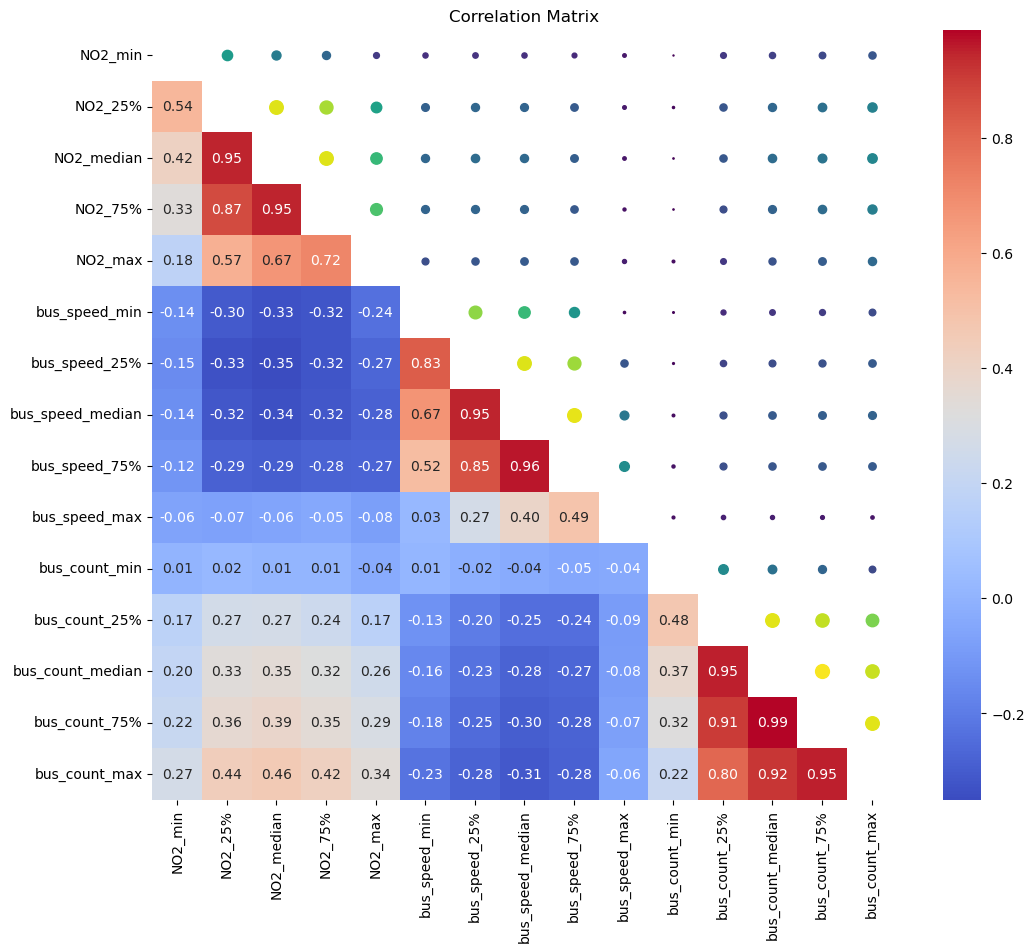

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data[['NO2_min', 'NO2_25%', 'NO2_median', 'NO2_75%', 'NO2_max',
                    'bus_speed_min', 'bus_speed_25%', 'bus_speed_median', 'bus_speed_75%', 'bus_speed_max',
                    'bus_count_min', 'bus_count_25%', 'bus_count_median', 'bus_count_75%', 'bus_count_max']].corr()

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Draw the heatmap with 'sns.heatmap()'
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

# Add circles with size and color proportional to the absolute correlation
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if not mask[i, j]:
            value = np.abs(corr_matrix.iloc[i, j])
            size = value * 100  # Set the size based on the absolute correlation
            color = value  # Set the color based on the absolute correlation
            plt.scatter(i + 0.5, j + 0.5, s=size, c=color, marker='o', vmin=0, vmax=1)

plt.title('Correlation Matrix')
plt.show()



In [ ]:
import plotly.graph_objects as go
import numpy as np
from scipy.interpolate import griddata


Y = DataForNO['FlowMean']
X = DataForNO['HourOfDay']
Z = DataForNO['Measurement']

xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((X, Y), Z, (xi, yi), method='cubic')
zi[zi < 0] = 0
"""


def calculate_color(x, y):
    return (x + y) / (x.max() + y.max())


color_values = calculate_color(xi, yi)

#only need to let surfacecolor=color_values

"""
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi, surfacecolor=yi)], 
                layout=go.Layout(
                    title='Correlation among NO2, FlowMean and Days',
                    autosize=False,
                    width=1250, height=800,
                    margin=dict(l=30, r=30, b=70, t=40)
                ))


fig.update_layout(scene=dict(
                    xaxis=dict(autorange='reversed', title='Time of Day'),
                    yaxis_title='FlowMean',
                    zaxis_title='NO2',
                    camera=dict(
                        up=dict(x=0, y=0, z=1),
                        center=dict(x=0, y=0, z=0),
                        eye=dict(x=2, y=2, z=0.01)
                    )))

fig.show()

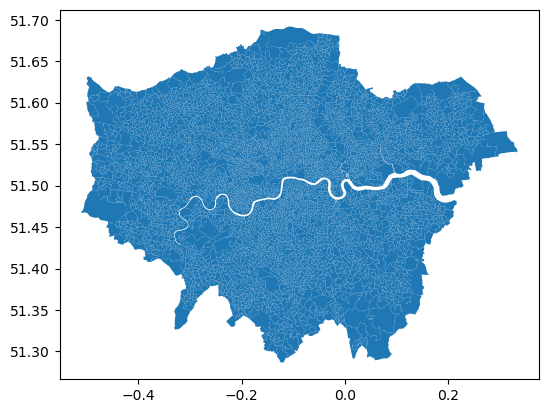

In [64]:
import geopandas as gpd
from pyproj import CRS
import contextily as ctx

# Read the shapefile
lsoa = gpd.read_file('D:\CASApre\DataDive2024\ESRI\LSOA_2011_London_gen_MHW.shp')

# Reproject to EPSG:4326
lsoa = lsoa.to_crs(epsg=4326)

# Plot the LSOA boundaries
lsoa.plot()

# Show the plot
plt.show()


In [56]:
sensor= pd.read_csv("D:\CASApre\DataDive2024\MonitoringSiteSpecies.csv")

sensor.head(3)



,LocalAuthorityCode,LocalAuthorityName,SiteCode,SiteName,SiteType,DateClosed,DateOpened,Latitude,Longitude,LatitudeWGS84,LongitudeWGS84,DataOwner,DataManager,SiteLink,SpeciesCode,SpeciesDescription,DateMeasurementStarted,DateMeasurementFinished
0,27,Richmond,TD0,#NAME?,Suburban,2018/1/1 0:00,1996/8/8 0:00,51.424304,-0.345715,6696103.277,-37808.88581,Richmond,King's College London,http://www.londonair.org.uk/london/asp/publicd...,NO2,Nitrogen Dioxide,2007/12/1 0:00,2018/1/1 0:00
1,27,Richmond,TD0,#NAME?,Suburban,2018/1/1 0:00,1996/8/8 0:00,51.424304,-0.345715,6696103.277,-37808.88581,Richmond,King's College London,http://www.londonair.org.uk/london/asp/publicd...,O3,Ozone,2007/12/1 0:00,2018/1/1 0:00
2,27,Richmond,TD0,#NAME?,Suburban,2018/1/1 0:00,1996/8/8 0:00,51.424304,-0.345715,6696103.277,-37808.88581,Richmond,King's College London,http://www.londonair.org.uk/london/asp/publicd...,PM25,PM2.5 Particulate,2007/1/1 0:00,2018/1/1 0:00


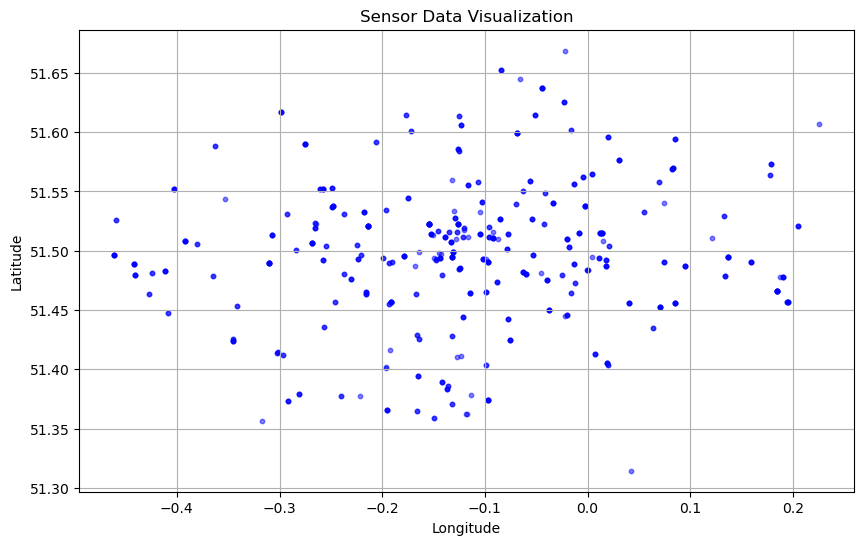

In [57]:
# Plot latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(sensor['Longitude'], sensor['Latitude'], s=10, c='b', alpha=0.5)
plt.title('Sensor Data Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [60]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(sensor['Longitude'], sensor['Latitude'])]
crs = {'init': 'epsg:4326'}  # Assuming the coordinate reference system is WGS84 (EPSG:4326)
sensor_gdf = gpd.GeoDataFrame(sensor, crs=crs, geometry=geometry)


# Perform spatial join
joined_data = gpd.sjoin(sensor_gdf, lsoa, how="left", op="within")


C:\Users\dune\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\dune\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3488: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\dune\AppData\Local\Temp\ipykernel_25900\1960178610.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

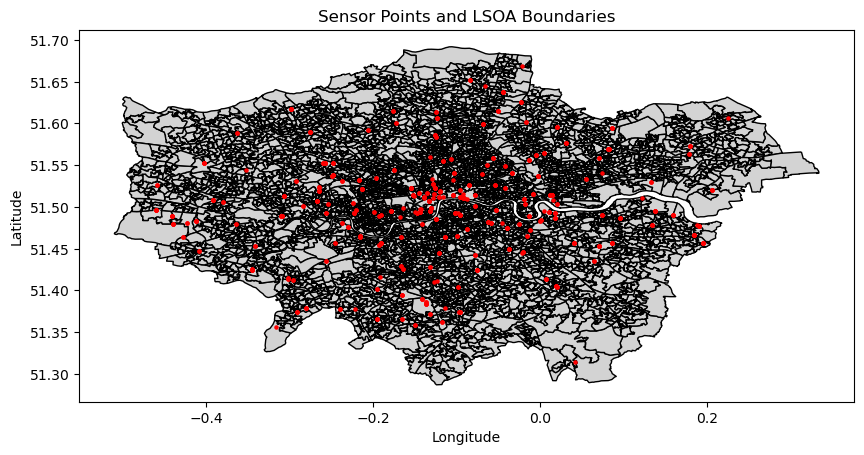

In [63]:

# Convert sensor DataFrame to GeoDataFrame
sensor['geometry'] = gpd.points_from_xy(sensor['Longitude'], sensor['Latitude'])
sensor = gpd.GeoDataFrame(sensor, geometry='geometry')


# Plot both layers
fig, ax = plt.subplots(figsize=(10, 10))
lsoa.plot(ax=ax, color='lightgrey', edgecolor='black')
sensor.plot(ax=ax, color='red', markersize=5)
plt.title('Sensor Points and LSOA Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



<Figure size 1000x600 with 0 Axes>

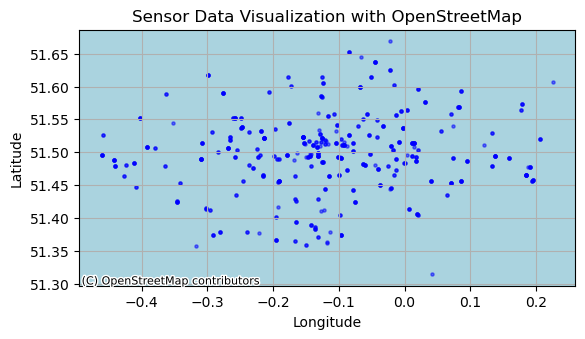

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx


# Plot latitude and longitude with basemap
plt.figure(figsize=(10, 6))

# Plot sensor data
ax = sensor.plot(markersize=5, color='blue', alpha=0.5)

# Add basemap - choose one of the available sources: 'OpenStreetMap', 'Stamen Terrain', 'Stamen Toner', 'Stamen Watercolor', 'CartoDB positron', 'CartoDB dark_matter'
ctx.add_basemap(ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('Sensor Data Visualization with OpenStreetMap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [75]:
import geopandas as gpd
import folium



# Create a base map
m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)  # London coordinates

# Add markers for sensor locations
for index, row in sensor.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)


# Display the map
m.save('D:\CASApre\DataDive2024\sensor_map.html')




In [76]:
m


In [95]:
import geopandas as gpd
import folium

# Create a base map
m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)  # London coordinates

# Add markers for sensor locations
for index, row in sensor.iterrows():
    # Create HTML content for the popup with multiple attributes
    popup_html = f"SiteCode: {row['SiteCode']},  {row['SiteName']},  {row['SpeciesCode']},StartDate: {row['DateMeasurementStarted']}, EndDate: {row['DateMeasurementFinished']}"
    # Create a popup with the HTML content
    popup = folium.Popup(popup_html, parse_html=True)
    # Add marker with popup
    folium.Marker([row['Latitude'], row['Longitude']], popup=popup).add_to(m)

# Expand the query box to show all attributes
m.fit_bounds([[sensor['Latitude'].min(), sensor['Longitude'].min()], [sensor['Latitude'].max(), sensor['Longitude'].max()]])

# Display the map
m.save('D:\CASApre\DataDive2024\sensor_map.html')






In [ ]:


driver = gdal.GetDriverByName('GTiff')
dataset = gdal.Open(bus_speed_tiff)
band = dataset.GetRasterBand(1)



transform = dataset.GetGeoTransform()


pixel_width = transform[1]
pixel_height = transform[5]
x_origin = transform[0]
y_origin = transform[3]


proj = dataset.GetProjection()
srs = osr.SpatialReference(wkt=proj)


cols = dataset.RasterXSize
rows = dataset.RasterYSize


data_array = band.ReadAsArray(0, 0, cols, rows)


w = pysal.lib.weights.KNN.from_array(data_array, k=5, transform=transform, ids=no2_data.index.tolist())


y = no2_data['NO2_concentration']
X = data_array.flatten()


model = pysal.model.GWR(y, X, w)


results = model.fit()


residuals = results.resid_response


fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(no2_data.geometry.x, no2_data.geometry.y, c=residuals, cmap='coolwarm', s=10)
ax.set_title('GWR Residuals')
plt.show()


print(results.summary())



In [11]:


def stitch_rasters(raster_paths: list[str]) -> np.ndarray:
    """Stitch rasters together into a 3D array

    Args:
        raster_paths (list[str]): ordered list of raster paths to stitch

    Returns:
        np.ndarray: array of shape (n_rasters, height, width)
    """

    arrays = []
    for path in raster_paths:
        with rasterio.open(path, "r") as src:
            arrays.append(src.read(1))
    return np.stack(arrays)


def get_raster_path_by_time(
    year: int, month: int, day: int, hour: int, type="count"
) -> str:
    """Gets the path to the raster corresponding to a given hour on a given day

    Args:
        year (int): 2023 or 2024
        month (int): month number (1-12)
        day (int): day number (1-31)
        hour (int): hour number (0-23)
        type (str, optional): count data of speed data. Defaults to "count".

    Returns:
        str: inferred path to the raster
    """
    base_dir: str = None
    if type == "count":
        if year == 2023:
            base_dir = "data/london_bus_data/distinctJourneyCounts_London_271023to080124/distinctJourneyCounts/2023"
        else:
            base_dir = "data/london_bus_data/distinctJourneyCounts_London_271023to080124/distinctJourneyCounts/2024"
    else:
        if year == 2023 and month < 12:
            base_dir = "data/london_bus_data/averageSpeeds_London_271023to301123"
        else:
            base_dir = "data/london_bus_data/averageSpeeds_London_011223to080124"

    day_dir = os.path.join(base_dir, str(month), str(day))
    # add leading zeros to hour
    hour_str = str(hour).zfill(2)
    day_str = str(day).zfill(2)
    month_str = str(month).zfill(2)
    return os.path.join(day_dir, f"{year}{month_str}{day_str}{hour_str}_3600_50.gtiff")


def calculate_pct_difference(
    change_arr: np.ndarray, source_arr: np.ndarray
) -> np.ndarray:
    """Calculates the percentage difference between the change array and the
    source array. If the source array is 0, the percentage difference is set to -1.

    Args:
        change_arr (np.ndarray): array to calculate the percentage difference for
        source_arr (np.ndarray): source array

    Returns:
        np.ndarray: array of elementwise percentage difference.
    """
    result_arr = np.zeros(change_arr.shape)
    for row in range(change_arr.shape[0]):
        for col in range(change_arr.shape[1]):
            if source_arr[row, col] == 0:
                result_arr[row, col] = -1
            else:
                result_arr[row, col] = (
                    (change_arr[row, col] - source_arr[row, col]) / source_arr[row, col]
                ) * 100
            result_arr[row, col] = round(result_arr[row, col], 0)
    return result_arr


def save_raster(
    data: np.ndarray, meta: dict, path: str, dtype: str = "float32"
) -> None:
    """Saves a raster to disk

    Args:
        data (np.ndarray): raster data
        meta (dict): raster metadata
        path (str): path to save the raster
        dtype (str, optional): data type of the raster. Defaults to "float32".
    """
    meta.update({"count": 1, "dtype": dtype})
    with rasterio.open(path, "w", **meta) as dst:
        dst.write(data, 1)


def aggergate_by_day(dates: dict, aggregation_method="sum") -> np.ndarray:
    """Aggregates a set of dates into a single array averaged daily.

    Args:
        dates (dict): dictionary containing the dates to aggregate

    Returns:
        np.ndarray: aggregated array
    """
    result_arr = None
    for year in dates:
        for month in dates[year]:
            for day in dates[year][month]:
                day_paths = [
                    get_raster_path_by_time(year, month, day, hour, type="count")
                    for hour in range(24)
                ]
                if aggregation_method == "sum":
                    day_aggregate = stitch_rasters(day_paths).sum(axis=0)
                else:
                    day_aggregate = stitch_rasters(day_paths).mean(axis=0)
                day_aggregate = np.expand_dims(day_aggregate, axis=0)
                if result_arr is None:
                    result_arr = day_aggregate
                else:
                    result_arr = np.concatenate([result_arr, day_aggregate])
    return result_arr.mean(axis=0)


def aggergate_by_hour(dates: dict) -> np.ndarray:
    """Aggregates a set of dates into a single array averaged daily.

    Args:
        dates (dict): dictionary containing the dates to aggregate

    Returns:
        np.ndarray: aggregated array of shape (n_hours, height, width)
    """
    result_arr = None
    for year in dates:
        for month in dates[year]:
            for day in dates[year][month]:
                day_paths = [
                    get_raster_path_by_time(year, month, day, hour, type="count")
                    for hour in range(24)
                ]
                # Shape (1, 24, height, width)
                day_arr = stitch_rasters(day_paths).expand_dims(axis=0)
                if result_arr is None:
                    result_arr = day_arr
                else:
                    result_arr = np.concatenate([result_arr, day_arr])
    return result_arr.mean(axis=0)



In [ ]:

if __name__ == "__main__":
    # protest_raster = stitch_rasters(
    #     get_raster_path_by_time(2023, 12, 16, hour, type="count") for hour in range(24)
    # ).sum(axis=0)

    # comparison_dates = {2023: {12: [2, 9, 23, 30]}}
    # comparison_agg = aggergate_by_day(comparison_dates)
    # pct_diff = calculate_pct_difference(protest_raster, comparison_agg)
    # save_raster(pct_diff, raster_meta, "road_closure.tif")

    pollution_df = pd.read_csv("data/Waterloo_CE2.csv")

    raster_path = get_raster_path_by_time(2023, 12, 7, 12, type="count")
    with rasterio.open(raster_path, "r") as src:
        raster_meta = src.meta
        transform = src.transform
        raster_arr = src.read(1)
    raster_crs = src.meta["crs"]
    # read geojson as gdf
    gdf = gpd.read_file("waterloo_sensor.geojson")
    # Convert crs of gpd
    gdf = gdf.to_crs(raster_crs)

    # Get the values of the raster at the points
    row, col = rasterio.transform.rowcol(transform, gdf.geometry.x, gdf.geometry.y)
    print(row, col)

    arr = np.zeros(raster_arr.shape)
    arr[row, col] = 1
    save_raster(arr, raster_meta, "test.tif", dtype="int32")

In [ ]:

config = dotenv_values(".env")
data_directory = config['DATADIR']
date_directory = data_directory + '\\distinctJourneyCounts\\2023\\10\\28\\'
visdir = config['VISDIR'] + '\\distinctJourneyCounts\\'

files = os.listdir(date_directory)
files_to_load = []
for f in files:
    files_to_load.append(f)
files_to_load.sort()

# Get max value for the files of interest
max_value = 0
for f in files_to_load:
    raster_data = rasterio.open(date_directory + f)
    file_max_value = raster_data.read(1).max()
    if file_max_value > max_value:
        max_value = file_max_value

fig = plt.figure(figsize=(4*raster_data.width/172, 4*raster_data.height/172),
                 dpi=172)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax = plt.subplot(111)
raster_data = rasterio.open(date_directory + files_to_load[0])
im = plt.imshow(raster_data.read(1), cmap='hot', vmin=0, vmax=max_value)
ax.axis('off')
title = ax.text(x=0.5,
        y=0.95,
        s=files_to_load[0].split('_')[0],
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes,
        color='white',
        fontsize=12)

def animate(i):
    a = im.get_array()
    raster_data = rasterio.open(date_directory + files_to_load[i])
    im.set_data(A=raster_data.read(1))
    title.set_text(files_to_load[i].split('_')[0])
    return im,

anim = animation.FuncAnimation(fig, animate, frames=24, interval=20, blit=True)
anim.save(visdir + 'distinctJourneyCounts_mplanimate_20231028.gif',
          fps=1)